In [131]:
import os

import scipy.stats as ss
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import category_encoders as ce
import pickle


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # nice visualisations
import matplotlib.pyplot as plt # basic visualisation library
import datetime as dt # library to opearate on dates

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))


from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')


pandas version: 1.2.4
numpy version: 1.20.1
seaborn version: 0.11.2


In [285]:
dataset_dict={"articles":"articles.csv","customers":"customers.csv","transactions":"transactions_train.csv"}

path = '../SourcesData'

df_articles=pd.read_csv(os.path.join(path,dataset_dict["articles"]))
df_customers=pd.read_csv(os.path.join(path,dataset_dict["customers"]))
df_transactions=pd.read_csv(os.path.join(path,dataset_dict["transactions"]))

In [286]:
df_articles.shape,df_customers.shape,df_transactions.shape

((105542, 25), (1371980, 7), (31788324, 5))

In [134]:
df_articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [135]:
df_articles.head(10)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
7,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
8,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...
9,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs..."


In [136]:
df_articles.dtypes

article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object

In [137]:
# Converting object dtype to categorical
categorical_columns = df_articles.select_dtypes(include='object').columns
for categorical_column in categorical_columns:
    df_articles[categorical_column] = pd.Categorical(df_articles[categorical_column])

In [138]:
all_columns = df_articles.columns.values


In [139]:
# percentage of uniqueness
for column in all_columns:
    per = len(df_articles[column].unique()) / df_articles.shape[0] * 100.0
    print(f'Percentage of unique {column}:\t {per}%')


Percentage of unique article_id:	 100.0%
Percentage of unique product_code:	 44.744272422353184%
Percentage of unique prod_name:	 43.46610827916848%
Percentage of unique product_type_no:	 0.1250686930321578%
Percentage of unique product_type_name:	 0.12412120293342935%
Percentage of unique product_group_name:	 0.018002311875840896%
Percentage of unique graphical_appearance_no:	 0.028424702961854047%
Percentage of unique graphical_appearance_name:	 0.028424702961854047%
Percentage of unique colour_group_code:	 0.047374504936423416%
Percentage of unique colour_group_name:	 0.047374504936423416%
Percentage of unique perceived_colour_value_id:	 0.007579920789827746%
Percentage of unique perceived_colour_value_name:	 0.007579920789827746%
Percentage of unique perceived_colour_master_id:	 0.018949801974569365%
Percentage of unique perceived_colour_master_name:	 0.018949801974569365%
Percentage of unique department_no:	 0.283299539519812%
Percentage of unique department_name:	 0.2368725246821

# detail_desc

In [140]:
df_articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [141]:
df_articles['detail_desc'].isnull().sum() / df_articles.shape[0] * 100.0


0.3941558810710428

In [142]:
df_articles = df_articles.dropna().reset_index()
df_articles.shape

(105126, 26)

In [143]:
# Top 10 product names
product_name = df_articles['prod_name'].value_counts()
product_name.head(10)

Dragonfly dress          98
Mike tee                 72
Wow printed tee 6.99     70
1pk Fun                  55
TP Paddington Sweater    54
Pria tee                 51
Despacito                48
MY                       44
Robin 3pk Fancy          43
Eivor 7-p shaftless      42
Name: prod_name, dtype: int64

In [144]:
# Top 10 product types
prod_type_name = df_articles['product_type_name'].value_counts()
prod_type_name

Trousers        11140
Dress           10318
Sweater          9271
T-shirt          7849
Top              4144
                ...  
Bra extender        1
Blanket             1
Towel               1
Wood balls          1
Cushion             1
Name: product_type_name, Length: 131, dtype: int64

In [145]:
# Top 10 product_group_name
product_group_name = df_articles['product_group_name'].value_counts()
product_group_name.head(10)

Garment Upper body    42593
Garment Lower body    19763
Garment Full body     13245
Accessories           11141
Underwear              5449
Shoes                  5196
Swimwear               3104
Socks & Tights         2438
Nightwear              1899
Unknown                 121
Name: product_group_name, dtype: int64

In [146]:
# Top 10 graphical_appearance_name
graphical_appearance_name = df_articles['graphical_appearance_name'].value_counts()
graphical_appearance_name.head(10)


Solid               49548
All over pattern    17116
Melange              5901
Stripe               4960
Denim                4835
Front print          3208
Placement print      3083
Check                2169
Colour blocking      1828
Lace                 1500
Name: graphical_appearance_name, dtype: int64

In [147]:
# Top 10 colour_group_name
colour_group_name = df_articles['colour_group_name'].value_counts()
colour_group_name.head(10)


Black             22559
Dark Blue         12117
White              9502
Light Pink         5794
Grey               4473
Light Beige        3344
Blue               3302
Red                3040
Light Blue         3004
Greenish Khaki     2763
Name: colour_group_name, dtype: int64

In [148]:
# Top 10 perceived_colour_value_name
perceived_colour_value_name = df_articles['perceived_colour_value_name'].value_counts()
perceived_colour_value_name.head(10)


Dark            42496
Dusty Light     22082
Light           15676
Medium Dusty    12602
Bright           6445
Medium           5693
Undefined         104
Unknown            28
Name: perceived_colour_value_name, dtype: int64

In [149]:
# Top 10 perceived_colour_master_name
perceived_colour_master_name = df_articles['perceived_colour_master_name'].value_counts()
perceived_colour_master_name.head(10)


Black          22475
Blue           18402
White          12614
Pink            9369
Grey            8885
Red             5849
Beige           5636
Green           3511
Khaki green     3174
Yellow          3112
Name: perceived_colour_master_name, dtype: int64

In [150]:
# Top 10 department names
department_name = df_articles['department_name'].value_counts()
department_name.head(10)


Jersey                     4590
Knitwear                   3499
Trouser                    2647
Blouse                     2356
Dress                      2081
Swimwear                   2055
Kids Girl Jersey Fancy     2024
Expressive Lingerie        1912
Young Girl Jersey Fancy    1872
Jersey Fancy               1754
Name: department_name, dtype: int64

In [151]:
# Top 10 index_name
index_name = df_articles['index_name'].value_counts()
index_name.head(10)


Ladieswear                        25912
Divided                           15086
Menswear                          12539
Children Sizes 92-140             11974
Children Sizes 134-170             9190
Baby Sizes 50-98                   8863
Ladies Accessories                 6885
Lingeries/Tights                   6726
Children Accessories, Swimwear     4592
Sport                              3359
Name: index_name, dtype: int64

In [152]:
# Top 10 section_name
section_name = df_articles['section_name'].value_counts()
section_name.head(10)


Womens Everyday Collection       7273
Divided Collection               7090
Baby Essentials & Complements    4930
Kids Girl                        4454
Young Girl                       3895
Womens Lingerie                  3563
Girls Underwear & Basics         3476
Womens Tailoring                 3355
Kids Boy                         3318
Womens Small accessories         3263
Name: section_name, dtype: int64

In [153]:
# Top 10 detail_desc
detail_desc = df_articles['detail_desc'].value_counts()
detail_desc.head(10)


T-shirt in printed cotton jersey.                                                      159
Leggings in soft organic cotton jersey with an elasticated waist.                      138
T-shirt in soft, printed cotton jersey.                                                137
Socks in a soft, jacquard-knit cotton blend with elasticated tops.                     136
Fine-knit trainer socks in a soft cotton blend with elasticated tops.                  134
Socks in a soft, fine-knit cotton blend with elasticated tops.                         118
Sunglasses with plastic frames and UV-protective, tinted lenses.                       117
Boxer shorts in a cotton weave with an elasticated waist, long legs and button fly.    104
Fine-knit socks in a soft cotton blend.                                                 97
Tights in a soft, fine-knit cotton blend with an elasticated waist.                     97
Name: detail_desc, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Bright'),
  Text(1, 0, 'Dark'),
  Text(2, 0, 'Dusty Light'),
  Text(3, 0, 'Light'),
  Text(4, 0, 'Medium'),
  Text(5, 0, 'Medium Dusty'),
  Text(6, 0, 'Undefined'),
  Text(7, 0, 'Unknown')])

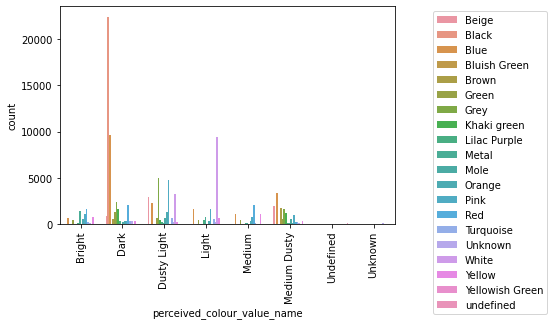

In [154]:
sns.countplot(x='perceived_colour_value_name',data=df_articles, hue='perceived_colour_master_name')
plt.legend(bbox_to_anchor=(1.1, 1))
plt.xticks(rotation=90)


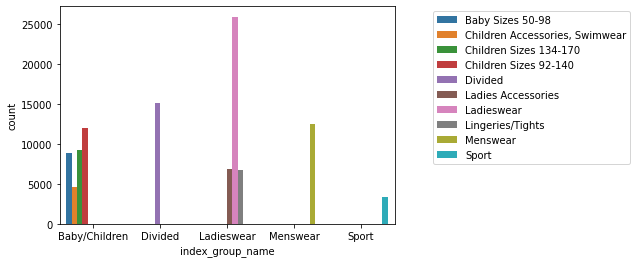

In [155]:
sns.countplot(x='index_group_name',data=df_articles, hue='index_name')
plt.legend(bbox_to_anchor=(1.1, 1))


In [156]:
# function courtesy -
# https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [157]:
f1 = 'department_name'
f2 = 'garment_group_name'

confusion_matrix = pd.crosstab(df_articles[f1], df_articles[f2])
cramers_v(confusion_matrix.values)


0.9987578032487684

In [158]:
f1 = 'index_name'
f2 = 'index_group_name'

confusion_matrix = pd.crosstab(df_articles[f1], df_articles[f2])
cramers_v(confusion_matrix.values)


0.9999762175994487

In [159]:
f1 = 'colour_group_name'
f2 = 'perceived_colour_value_name'
f3 = 'perceived_colour_master_name'

confusion_matrix = pd.crosstab(df_articles[f1], df_articles[f2])
f1_f2 = cramers_v(confusion_matrix.values)

confusion_matrix = pd.crosstab(df_articles[f1], df_articles[f3])
f1_f3 = cramers_v(confusion_matrix.values)

confusion_matrix = pd.crosstab(df_articles[f2], df_articles[f3])
f2_f3 = cramers_v(confusion_matrix.values)

print(f'Between f1 and f2: {f1_f2}')
print(f'Between f1 and f3: {f1_f3}')
print(f'Between f2 and f3: {f2_f3}')

Between f1 and f2: 0.8139481834784196
Between f1 and f3: 0.8446526750701804
Between f2 and f3: 0.5942933218110033


In [160]:
f1 = 'prod_name'
f2 = 'product_type_name'
f3 = 'product_group_name'

confusion_matrix = pd.crosstab(df_articles[f1], df_articles[f2])
f1_f2 = cramers_v(confusion_matrix.values)

confusion_matrix = pd.crosstab(df_articles[f1], df_articles[f3])
f1_f3 = cramers_v(confusion_matrix.values)

confusion_matrix = pd.crosstab(df_articles[f2], df_articles[f3])
f2_f3 = cramers_v(confusion_matrix.values)

print(f'Between f1 and f2: {f1_f2}')
print(f'Between f1 and f3: {f1_f3}')
print(f'Between f2 and f3: {f2_f3}')

Between f1 and f2: 0.6911712064090091
Between f1 and f3: 0.7148413543990286
Between f2 and f3: 0.9950526501927501


# Exploring customers


In [161]:
df_customers.shape

(1371980, 7)

In [162]:
df_customers.head(2).T


,0,1
customer_id,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...
FN,NaN,NaN
Active,NaN,NaN
club_member_status,ACTIVE,ACTIVE
fashion_news_frequency,NONE,NONE
age,49.0,25.0
postal_code,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...


In [163]:
df_customers.dtypes


customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object

In [164]:
# Converting object dtype to categorical
categorical_columns = df_customers.select_dtypes(include='object').columns
for categorical_column in categorical_columns:
    if 'customer_id' not in categorical_column:
        df_customers[categorical_column] = pd.Categorical(df_customers[categorical_column])


In [165]:
100.0 * df_customers.isnull().sum() / df_customers.shape[0]


customer_id                0.000000
FN                        65.237831
Active                    66.150819
club_member_status         0.441843
fashion_news_frequency     1.166854
age                        1.156066
postal_code                0.000000
dtype: float64

In [166]:
sorted(df_customers['age'].unique())

[16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 38.0,
 40.0,
 41.0,
 45.0,
 48.0,
 49.0,
 52.0,
 54.0,
 nan,
 36.0,
 37.0,
 39.0,
 42.0,
 43.0,
 44.0,
 46.0,
 47.0,
 50.0,
 51.0,
 53.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0]

In [167]:
df_customers.groupby('age')['customer_id'].nunique()


age
16.0      161
17.0     9392
18.0    24323
19.0    37707
20.0    55196
        ...  
95.0       10
96.0        3
97.0        4
98.0        7
99.0       13
Name: customer_id, Length: 84, dtype: int64

In [168]:
df_customers.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [169]:
df_customers


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [170]:
df_customers.isnull().sum()


customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [171]:
100.0 * df_customers.isnull().sum() / df_customers.shape[0]

customer_id                0.000000
FN                        65.237831
Active                    66.150819
club_member_status         0.441843
fashion_news_frequency     1.166854
age                        1.156066
postal_code                0.000000
dtype: float64

In [172]:
df_customers.head(100)


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
95,00041bd4c669adc077b6488a2d23ee229a9ad962ab3ee7...,NaN,NaN,PRE-CREATE,NONE,58.0,ea731df2fc7625e27cb20ea1a17bb3255ddb125ef35459...
96,00045027219e894b683fb4687211e2d0c904c268e9f28d...,NaN,NaN,ACTIVE,NONE,20.0,777fe14eafe75737a8e234db25da1d0e0c5009c3931f02...
97,0004518be81f6f0dd216dc5699016bc159ebb9dbd62a76...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
98,00045b41ba4df7a2e6c09093ec92873ea43a137cf2b24c...,NaN,NaN,ACTIVE,NONE,18.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


In [173]:
df_customers.groupby('club_member_status')['customer_id'].nunique()

club_member_status
ACTIVE        1272491
LEFT CLUB         467
PRE-CREATE      92960
Name: customer_id, dtype: int64

In [174]:
df_customers.groupby('fashion_news_frequency')['customer_id'].nunique()


fashion_news_frequency
Monthly         842
NONE         877711
None              2
Regularly    477416
Name: customer_id, dtype: int64

In [175]:
df_customers['fashion_news_frequency'].unique()


['NONE', 'Regularly', NaN, 'Monthly', 'None']
Categories (4, object): ['NONE', 'Regularly', 'Monthly', 'None']

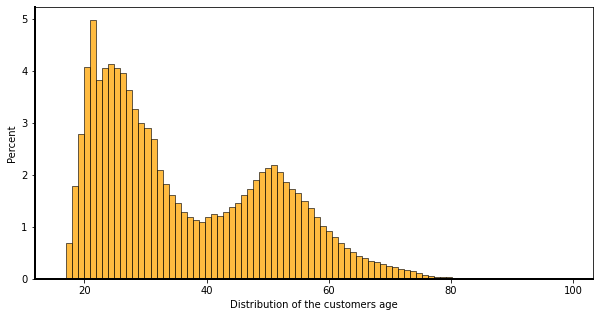

In [176]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=df_customers, x='age', bins=df_customers['age'].nunique(), color='orange', stat="percent")
ax.set_xlabel('Distribution of the customers age')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
plt.show()

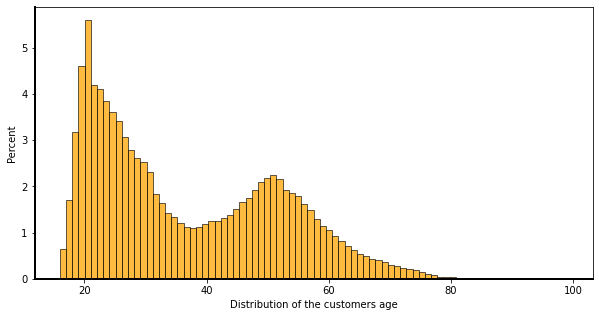

In [177]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=df_customers[df_customers.FN==1], x='age', bins=df_customers[df_customers.FN==1]['age'].nunique(), color='orange', stat="percent")
ax.set_xlabel('Distribution of the customers age')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
plt.show()




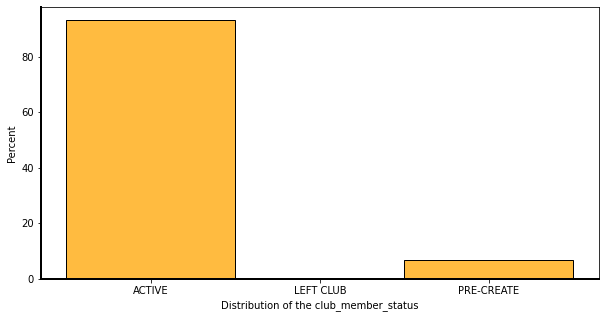

In [178]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=df_customers, x='club_member_status', bins=df_customers['club_member_status'].nunique(), color='orange', stat="percent")
ax.set_xlabel('Distribution of the club_member_status')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
plt.show()

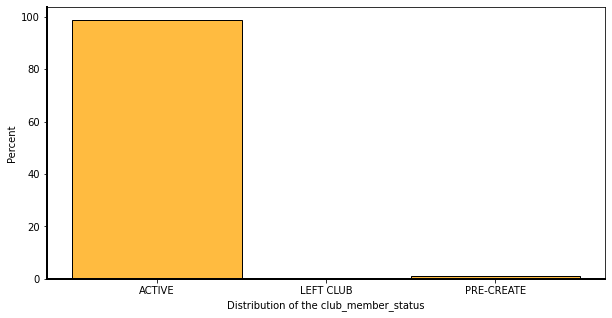

In [179]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=df_customers[df_customers.FN==1], x='club_member_status', bins=df_customers[df_customers.FN==1]['club_member_status'].nunique(), color='orange', stat="percent")
ax.set_xlabel('Distribution of the club_member_status')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
plt.show()

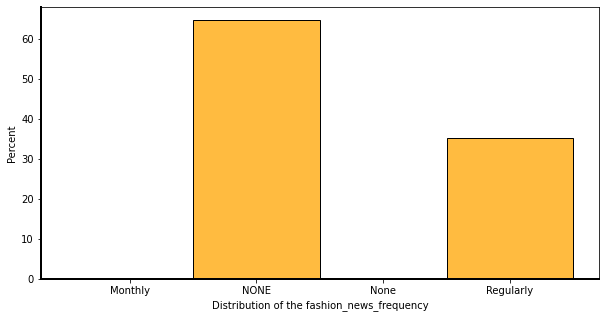

In [180]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=df_customers, x='fashion_news_frequency', bins=df_customers['fashion_news_frequency'].nunique(), color='orange', stat="percent")
ax.set_xlabel('Distribution of the fashion_news_frequency')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
plt.show()

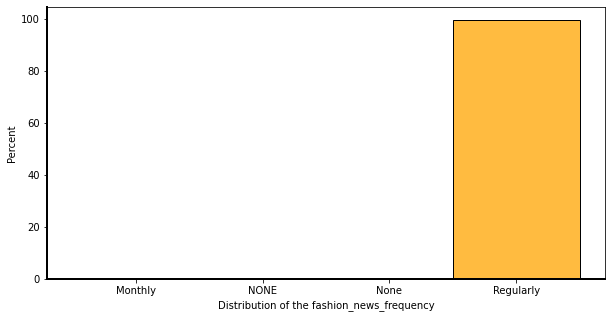

In [181]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=df_customers[df_customers.FN==1], x='fashion_news_frequency', bins=df_customers[df_customers.FN==1]['fashion_news_frequency'].nunique(), color='orange', stat="percent")
ax.set_xlabel('Distribution of the fashion_news_frequency')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
plt.show()

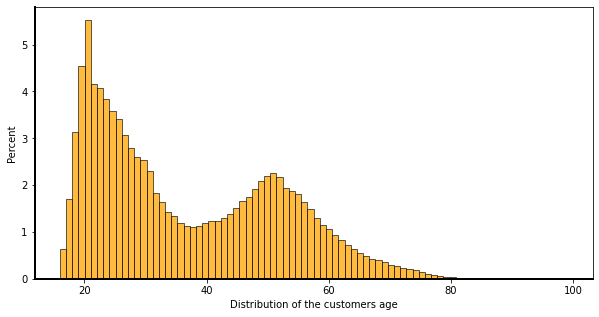

In [182]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=df_customers[df_customers.Active==1], x='age', bins=df_customers[df_customers.Active==1]['age'].nunique(), color='orange', stat="percent")
ax.set_xlabel('Distribution of the customers age')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
plt.show()


In [184]:
perceived_postal_code = df_customers['postal_code'].value_counts()
perceived_postal_code.head(10)

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
1f5bd429acc88fbbf24de844a59e438704aa8761bc7b99fd977cad297c50b74c       154
9d5787501bf1c77592156ba51eab13f4a2670c807686431a9e22a69090b02358       141
a1959a16bf167858c93a66ec2a330644512b25fb10f97eee2058549885af4dbd       138
087a46b65170845b4a55226ff1eb748ce7843d4b637cbe17f6bfbd1e645d2ffb       134
4d22901a97bd952bb92cdd31b38c39b41dd3250a735cabdfac1503eb405b807d       132
Name: postal_code, dtype: int64

In [188]:
df_customers['postal_code'].nunique(),df_customers['postal_code'].count()

(352899, 1371980)

In [193]:
df_customers[df_customers.age==99].customer_id

191659     23b7e974d88a6373ba0e02fd39b1a048dec0ac8a9b4ed0...
232150     2b5284f19d272d7b7f1006289566076d72a7f097feb03f...
293547     36d219eb822d04d07e5bb31e39caffefc17da81ff4a19b...
307448     39719241efb3559eca60886d58f0fe01cbf8d5efea0e25...
316525     3b28156770e0a17436b29831e41394528f74b4ec2c37d3...
318986     3b9ec1854ba779c3c11389985299e642b5779947ff8395...
559892     687c675e64e5f5d962c99ebf915da230be8c907a65a1d5...
628882     7558adbc0401acdd74a7c8633ad97d25979e9859b8abca...
857736     a01bd2e0e8bbf8db61f0e623a05325cde84955a37415b7...
860989     a0b9e2473f699821b72833824a3e95972862039a49c5e9...
868311     a2106ba216f519880fbebd7a1fe1929802ac1258adabbf...
1246886    e8b2a7bf44f42e808d58299c53e6e1ad47178d7d457f82...
1278960    eeaeb36eecef27871a0fe587858906e5f28d43872f6a4a...
Name: customer_id, dtype: object

In [208]:
df3=df_customers.set_index('customer_id').join(df_transactions.set_index('customer_id'))

In [210]:
df3[df3.age==99]


,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,article_id,price,sales_channel_id
customer_id,,,,,,,,,,
23b7e974d88a6373ba0e02fd39b1a048dec0ac8a9b4ed0924003803ed5e1f694,NaN,NaN,ACTIVE,NONE,99.0,4cae8633de56064a17826b7da3feb760f2c152a93164d1...,2019-05-27,534164001.0,0.033881,2.0
23b7e974d88a6373ba0e02fd39b1a048dec0ac8a9b4ed0924003803ed5e1f694,NaN,NaN,ACTIVE,NONE,99.0,4cae8633de56064a17826b7da3feb760f2c152a93164d1...,2019-05-27,596877005.0,0.042356,2.0
2b5284f19d272d7b7f1006289566076d72a7f097feb03f5c3e03ab39aa5bcc36,NaN,NaN,ACTIVE,NONE,99.0,8321392df5bfee24de6920492d8c9810f4bd422d0a527e...,2019-05-01,717490002.0,0.008458,2.0
2b5284f19d272d7b7f1006289566076d72a7f097feb03f5c3e03ab39aa5bcc36,NaN,NaN,ACTIVE,NONE,99.0,8321392df5bfee24de6920492d8c9810f4bd422d0a527e...,2019-05-01,618800001.0,0.033881,2.0
2b5284f19d272d7b7f1006289566076d72a7f097feb03f5c3e03ab39aa5bcc36,NaN,NaN,ACTIVE,NONE,99.0,8321392df5bfee24de6920492d8c9810f4bd422d0a527e...,2019-05-01,711053004.0,0.013542,2.0
...,...,...,...,...,...,...,...,...,...,...
eeaeb36eecef27871a0fe587858906e5f28d43872f6a4aa561ff78947124c39d,1.0,1.0,ACTIVE,Regularly,99.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...,2019-01-16,685816006.0,0.007610,1.0
eeaeb36eecef27871a0fe587858906e5f28d43872f6a4aa561ff78947124c39d,1.0,1.0,ACTIVE,Regularly,99.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...,2019-01-16,683020001.0,0.015254,1.0
eeaeb36eecef27871a0fe587858906e5f28d43872f6a4aa561ff78947124c39d,1.0,1.0,ACTIVE,Regularly,99.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...,2019-01-16,679525003.0,0.045746,1.0


In [203]:
df_transactions.head()


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [257]:
df_customers_cleaned = df_customers.drop(columns=['FN','Active'])
df_customers_cleaned


,customer_id,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [259]:
df_customers_cleaned.isnull().sum()


customer_id                   0
club_member_status         6062
fashion_news_frequency    16009
age                       15861
postal_code                   0
dtype: int64

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

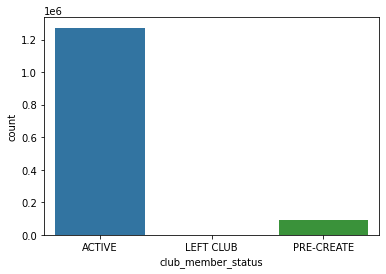

In [260]:
sns.countplot(df_customers_cleaned.club_member_status)
df_customers_cleaned.club_member_status.value_counts()


NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

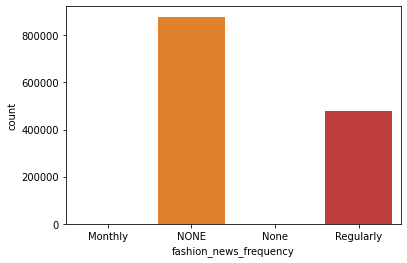

In [256]:
sns.countplot(df_customers_cleaned.fashion_news_frequency)
df_customers_cleaned.fashion_news_frequency.value_counts()


In [267]:
mask = df_customers_cleaned[df_customers_cleaned['fashion_news_frequency'] == 'None'].index.values
df_customers_cleaned.loc[mask, 'fashion_news_frequency'] = 'NONE'

### Impute Age

<AxesSubplot:xlabel='age', ylabel='Density'>

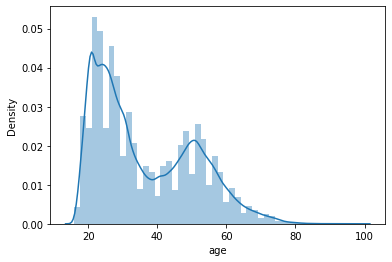

<AxesSubplot:xlabel='age', ylabel='Density'>

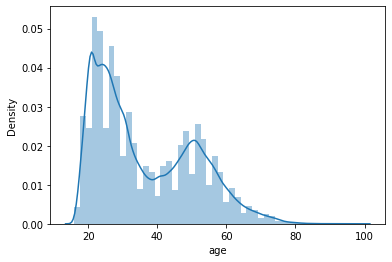

In [262]:
sns.distplot(df_customers_cleaned.age)

<AxesSubplot:xlabel='club_member_status', ylabel='age'>

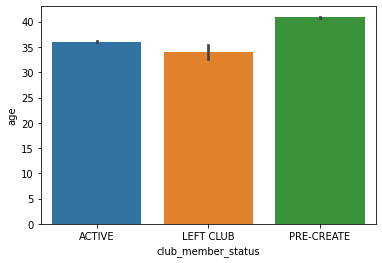

In [263]:
sns.barplot(x='club_member_status', y='age', data=df_customers_cleaned)


In [270]:
df_customers_cleaned_ = df_customers_cleaned.copy()
map_means = df_customers_cleaned_.groupby('club_member_status')['age'].mean().to_dict()
map_means


{'ACTIVE': 36.07799061010618,
 'LEFT CLUB': 33.98922413793103,
 'PRE-CREATE': 40.88531252919742}

<AxesSubplot:xlabel='fashion_news_frequency', ylabel='age'>

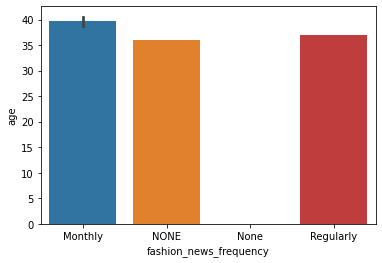

In [268]:
sns.barplot(x='fashion_news_frequency', y='age', data=df_customers_cleaned)

In [269]:
df_customers_cleaned_ = df_customers_cleaned.copy()
map_means = df_customers_cleaned_.groupby('fashion_news_frequency')['age'].mean().to_dict()
map_means


{'Monthly': 39.686087990487515,
 'NONE': 36.006095193187804,
 'None': nan,
 'Regularly': 37.03067967770589}

In [271]:
# Impute the Age with the mean age of club_member_status/fashion_news_frequency
mask = df_customers_cleaned['age'].isnull()
age_values = df_customers_cleaned.loc[mask, 'club_member_status'].map(map_means).values
is_nan_age = df_customers_cleaned.loc[mask, 'age'].index.values

for i in tqdm(range(len(is_nan_age))):
    df_customers_cleaned.loc[is_nan_age[i], 'age'] = age_values[i]

100%|██████████| 15861/15861 [02:28<00:00, 106.54it/s]


In [255]:
# Impute club_member_status by majority vote value which is "Active".
df_customers_cleaned['club_member_status'].fillna('ACTIVE', inplace=True)

In [247]:
# Impute fashion_news_frequency by majority vote value which is "NONE".
df_customers_cleaned['fashion_news_frequency'].fillna('NONE', inplace=True)

In [248]:
df_customers_cleaned.isnull().sum()


customer_id                   0
club_member_status            0
fashion_news_frequency        0
age                       15861
postal_code                   0
dtype: int64

In [272]:
df_customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [275]:
from DataCleaning.data_cleaning import *

df_customers_clean_test = df_customers.copy()
# df_customers_clean_test = clean_FN(df_customers_clean_test)
# df_customers_clean_test = clean_Active(df_customers_clean_test)
df_customers_clean_test = clean_club_member_status(df_customers_clean_test)
df_customers_clean_test = clean_fashion_news_frequency(df_customers_clean_test)
df_customers_clean_test = clean_Age(df_customers_clean_test)

100%|██████████| 15861/15861 [03:34<00:00, 73.98it/s] 


In [276]:
df_customers_clean_test.isnull().sum()


customer_id                    0
FN                        895050
Active                    907576
club_member_status             0
fashion_news_frequency         0
age                            0
postal_code                    0
dtype: int64

In [277]:
df_customers_clean_test['FN'] = df_customers_clean_test['FN'].fillna(0)


In [278]:
df_customers_clean_test.isnull().sum()

customer_id                    0
FN                             0
Active                    907576
club_member_status             0
fashion_news_frequency         0
age                            0
postal_code                    0
dtype: int64

In [279]:
df_customers_clean_test


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [280]:
df_customers_clean_test = clean_Active(df_customers_clean_test)


In [281]:
df_customers_clean_test.isnull().sum()


customer_id               0
FN                        0
club_member_status        0
fashion_news_frequency    0
age                       0
postal_code               0
dtype: int64